## Project milk quality

### Objective:
- In this project we are going to the investigative phase of Milk_Diagnostic (a device for collecting and sending milk data on the farm via SMS), we are going to carry out a survey of the variation in milk temperature over a given period. Here we will make a prediction of these temperatures, using reinforcement learning for the next few minutes to alert both the producer and the collecting company about a possible spike in the temperature of the milk stored on the farm, before the event happens.

- Nesse projeto vamos para a fase investigatória do Milk_Diagnostic (aparelho de coleta e envio de dados do leite na fazenda via sms), vamos treinar um modelo de classificação, utilizando modelos de machine learning para demonstrar se a variação de temperatura indica alguma anomalia ou não de contaminação no leite que está armazenado no tanque da fazenda, aguardando ser recolhido.

### Data Origin:
- Dataset: MILK_temperature.TXT

- Through the Milk_Diagnostic equipment (device for collecting and sending milk data on the farm via SMS) data on milk temperature, ambient temperature, date, time, humidity, geographic coordinates, are transferred daily from the farm's milk reservoir every 10 minutes (configurable), 24 hours a day, 7 days a week.

- Através do equipamento Milk_Diagnostic (aparelho de coleta e envio de dados do leite na fazenda via sms)os dados de temperatura do leite, temperatura ambiente, data, hora, umidade, coordenadas geográficas, são transferidos diariamente do reservatório de leite da fazenda a cada 10 minutos (configurável), 24 horas por dia durante os 7 dias da semana.

Aqui está o que as colunas representam:

    local: identificador da fazendo origem do leite
    data: data da coleta da temperatura
    hora: hora, minutos e segundos da coleta da temperatura
    lat: latitude do local da fazenda
    long: longitude do local da fazenda
    umidade: umidade ambiente do local do tanque de leite
    t_ex: temperatura ambiente do local do tanque de leite
    t1, t2, t3, t4, t5, t6, t7, t8: 
        temperaturas coletadas dentro do intervalo configurado para envio (10 minutos para esse trabalho)

- ## Análise exploratória dos dados
- ## Preparação dos dados
- ## Armazenamento dos dados tratados

In [134]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning

In [135]:
# preparação e visualização de dados
from sklearn.compose import ColumnTransformer # Aplica transformadores a colunas de um array ou pandas DataFrame

from sklearn.preprocessing import OrdinalEncoder # convertendo dados categoricos em numerico (categoria sequencial)

from matplotlib import pyplot # plotagem gráfica
import seaborn as sns # plotagem gráfica baseada em matplotlib
import numpy as np # computação de matrizes

In [136]:
# preparação e visualização de dados
from matplotlib import pyplot as plt # plotagem gráfica

In [137]:
# métricas de verificação
from scipy.stats import skew # verifica se a base do sino da distribuição normal está entre -2 e 2 que é o limite viável
from scipy.stats import kurtosis # verifica se o cume do sino da distribuição normal está entre -2 e 2 (limite viável)

In [138]:
# carregando dados do arquivo
df_milk = pd.read_csv('dataset/MILK_temperature.csv', sep='p')

In [139]:
# verificando a quantidade de linhas e colunas do dataframe
df_milk.shape

(14327, 16)

In [140]:
# reconhecendo as primeiras linhas do dataframe
df_milk.head(3)

,local,data,hora,lat,long,umidade,t_ex,t1,t2,t3,t4,t5,t6,t7,t8,Unnamed: 15
0,1,0/ 0/2000,6:36:19,-18.918142,-48.230560,67.000000,26.799999,NAN,10.7400,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,0/ 0/2000,8:14:46,-18.918184,-48.230553,53.000000,26.700001,NAN,25.0525,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1,0/ 0/2000,8:34:31,-18.918177,-48.230583,44.000000,26.600000,NAN,24.1150,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [141]:
# eliminando a última coluna sem dados
colunas = list(df_milk.columns)

df_milk = df_milk[colunas[:15]]

In [142]:
# verificando a estrutura das variáveis e se tem algum dados nulo
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14327 entries, 0 to 14326
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   local    14327 non-null  int64  
 1   data     14327 non-null  object 
 2   hora     14327 non-null  object 
 3   lat      14327 non-null  float64
 4   long     14327 non-null  float64
 5   umidade  14327 non-null  object 
 6   t_ex     14327 non-null  object 
 7   t1       14327 non-null  object 
 8   t2       14327 non-null  float64
 9   t3       14327 non-null  float64
 10  t4       14327 non-null  float64
 11  t5       14327 non-null  float64
 12  t6       14327 non-null  float64
 13  t7       14327 non-null  float64
 14  t8       14327 non-null  float64
dtypes: float64(9), int64(1), object(5)
memory usage: 1.6+ MB


In [143]:
# verificando as datas que precisam de correção
df_milk.data.unique()

array([' 0/ 0/2000', ' 1/ 8/2023', ' 1/ 9/2023', ' 1/10/2023',
       ' 1/11/2023', ' 2/ 8/2023', ' 2/10/2023', ' 2/11/2023',
       ' 3/ 8/2023', ' 3/10/2023', ' 3/11/2023', ' 4/ 8/2023',
       ' 4/ 9/2023', ' 4/10/2023', ' 4/11/2023', ' 5/ 8/2023',
       ' 5/10/2023', ' 5/11/2023', ' 5/12/2023', ' 6/ 8/2023',
       ' 6/10/2023', ' 6/11/2023', ' 7/ 8/2023', ' 7/10/2023',
       ' 7/11/2023', ' 8/ 9/2023', ' 8/10/2023', ' 8/11/2023',
       ' 9/ 8/2023', ' 9/ 9/2023', ' 9/10/2023', ' 9/11/2023',
       ' 9/12/2023', '10/ 9/2023', '10/10/2023', '10/11/2023',
       '11/ 8/2023', '11/ 9/2023', '11/10/2023', '12/ 9/2023',
       '12/10/2023', '13/ 7/2023', '13/ 8/2023', '13/ 9/2023',
       '13/10/2023', '14/ 7/2023', '14/ 8/2023', '14/ 9/2023',
       '14/10/2023', '15/ 7/2023', '15/ 8/2023', '15/ 9/2023',
       '15/10/2023', '16/ 7/2023', '16/ 9/2023', '16/10/2023',
       '17/ 7/2023', '17/ 9/2023', '17/10/2023', '18/ 7/2023',
       '18/ 9/2023', '18/10/2023', '19/ 7/2023', '19/ 9

In [144]:
# eliminando data inválida
df_remove = df_milk.loc[(df_milk['data'] == ' 0/ 0/2000')]
df_milk = df_milk.drop(df_remove.index)

In [145]:
# troca espaços por zero na data
def substitui_espacos_data(data): 
    return data.replace(' ', '0')

In [146]:
# troca espaços por zero na hora e modifica hora inválida para nulo
def substitui_espacos_hora(hora): 
    hora = hora.replace(' ', '0')
    
    if hora[3] == ':':
        #hora = '0' + hora[2:]
        hora = None

    return hora

In [147]:
# invoca as funções para substituir espaços por zeros e hora por nulo
df_milk['data'] = df_milk['data'].apply(substitui_espacos_data)
df_milk['hora'] = df_milk['hora'].apply(substitui_espacos_hora)

In [148]:
# cria coluna com data e hora completa
df_milk['data_hora'] = df_milk['data'] + ' ' + df_milk['hora']

In [149]:
# convertendo o tipo de dados da variável
df_milk['t1'] = df_milk['t1'].astype('float64')
df_milk['umidade'] = df_milk['umidade'].astype('float64')
df_milk['t_ex'] = df_milk['t_ex'].astype('float64')
df_milk['data_hora'] = df_milk['data_hora'].astype('datetime64[ns]')

In [150]:
# eliminando mês maior que 07
df_remove = df_milk.loc[(df_milk.data_hora.dt.month > 6)]
df_milk = df_milk.drop(df_remove.index)

- Vamos considerar somente dados até o mês 06 por apresentar melhores dados coletados

In [151]:
# eliminando dados inválidos
df_remove = df_milk.loc[(df_milk['t_ex'] < 0.1) | 
                        (df_milk['t1'] < 0.1) | 
                        (df_milk['t2'] < 0.1) | 
                        (df_milk['t3'] < 0.1) | 
                        (df_milk['t4'] < 0.1) | 
                        (df_milk['t5'] < 0.1) | 
                        (df_milk['t6'] < 0.1) | 
                        (df_milk['t7'] < 0.1) | 
                        (df_milk['t8'] < 0.1) | 
                        (df_milk['umidade'] < 0.1)
                        ]
df_milk = df_milk.drop(df_remove.index)

- Foram eliminadas temperaturas negativas e zeradas

In [152]:
# verificando a existência de nulos
df_milk.isnull().value_counts()

local  data   hora   lat    long   umidade  t_ex   t1     t2     t3     t4     t5     t6     t7     t8     data_hora
False  False  False  False  False  False    False  False  False  False  False  False  False  False  False  False        2058
              True   False  False  False    False  False  False  False  False  False  False  False  False  True         1619
              False  False  False  False    False  True   False  False  False  False  False  False  False  False           5
Name: count, dtype: int64

In [153]:
# confirmando a presença de nulos nos dados
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3682 entries, 11 to 14326
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   local      3682 non-null   int64         
 1   data       3682 non-null   object        
 2   hora       2063 non-null   object        
 3   lat        3682 non-null   float64       
 4   long       3682 non-null   float64       
 5   umidade    3682 non-null   float64       
 6   t_ex       3682 non-null   float64       
 7   t1         3677 non-null   float64       
 8   t2         3682 non-null   float64       
 9   t3         3682 non-null   float64       
 10  t4         3682 non-null   float64       
 11  t5         3682 non-null   float64       
 12  t6         3682 non-null   float64       
 13  t7         3682 non-null   float64       
 14  t8         3682 non-null   float64       
 15  data_hora  2063 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12), int64(1), 

In [154]:
# confirmando quais variáveis possuem nulos
df_milk.isnull().sum()

local           0
data            0
hora         1619
lat             0
long            0
umidade         0
t_ex            0
t1              5
t2              0
t3              0
t4              0
t5              0
t6              0
t7              0
t8              0
data_hora    1619
dtype: int64

- A hora e t1 possuem nulos que serão eliminados no próximo passo

In [155]:
# apagando linhas com nulos
df_milk = df_milk.dropna()

In [156]:
# verificando se existe registros duplicados
df_milk.duplicated().sum()

2

In [157]:
# apagando linhas duplicadas
df_milk = df_milk.drop_duplicates()

In [158]:
# verificando quantas linhas sobraram
df_milk.shape

(2056, 16)

- Após a eliminação de algumas linhas verificamos que sobrou um nro satisfatório para a realização do nosso treinamento do modelo de aprendizado por reforço.

In [159]:
# ordenando o dataframe pela data e hora
df_milk = df_milk.sort_values(by='data_hora')

In [160]:
# resetando o index e apagando a coluna do indice antigo
df_milk = df_milk.reset_index()
df_milk = df_milk.drop(columns='index')

In [161]:
# fazendo uma análise geral das variáveis que sobraram e suas características
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   local      2056 non-null   int64         
 1   data       2056 non-null   object        
 2   hora       2056 non-null   object        
 3   lat        2056 non-null   float64       
 4   long       2056 non-null   float64       
 5   umidade    2056 non-null   float64       
 6   t_ex       2056 non-null   float64       
 7   t1         2056 non-null   float64       
 8   t2         2056 non-null   float64       
 9   t3         2056 non-null   float64       
 10  t4         2056 non-null   float64       
 11  t5         2056 non-null   float64       
 12  t6         2056 non-null   float64       
 13  t7         2056 non-null   float64       
 14  t8         2056 non-null   float64       
 15  data_hora  2056 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12), int64(1

In [162]:
# cria uma coluna de média dos 8 valores da temperatura do leite capturados no intervalo de envio
df_milk['temp'] = (df_milk['t1'] + df_milk['t2'] + df_milk['t3'] + df_milk['t4'] + \
                   df_milk['t5'] + df_milk['t6'] + df_milk['t7'] + df_milk['t8']) / 8 

In [163]:
# verificando as variáveis que serão utilizadas nesse trabalho
df_milk[['temp', 't_ex', 'umidade']].head(10)

,temp,t_ex,umidade
0,24.423272,25.892607,47.418488
1,24.360077,25.869171,47.540405
2,24.278691,25.812103,47.464645
3,24.210923,25.660603,47.419193
4,24.170970,25.644939,47.535355
5,24.111838,25.609079,47.424244
6,24.066316,25.467169,47.166668
7,23.982315,25.413635,47.176769
8,23.893088,25.347979,47.060608
9,23.914008,25.316149,47.257576


- A temperatura do leite 'temp' está com um valor acima do normal (seria em torno de 4°) pois foi gerada em laboratório utilizando o milk diagnostic.
- Vamos então fazer uma correção nessa temperatura para aproximá-la da real.

In [164]:
# corrige a temperatura do leite gerada em laboratório
def temperatura_leite(temp):
    if int(temp) > 4:
        temp = (4 + (temp%1)) 

    if temp <= 4.2:
        temp = (3 + (temp%1)) 
    elif temp <= 4.6:
        temp = 4.0
    elif temp <= 4.8:
        temp = (5 + (temp%1)) 
    elif temp <= 4.9:
        temp = (6 + (temp%1))
    else:
        temp = (7 + (temp%1))           
        
    return temp

In [165]:
# invoca a função para correção da temperatura
df_milk.temp = df_milk['temp'].apply(temperatura_leite)

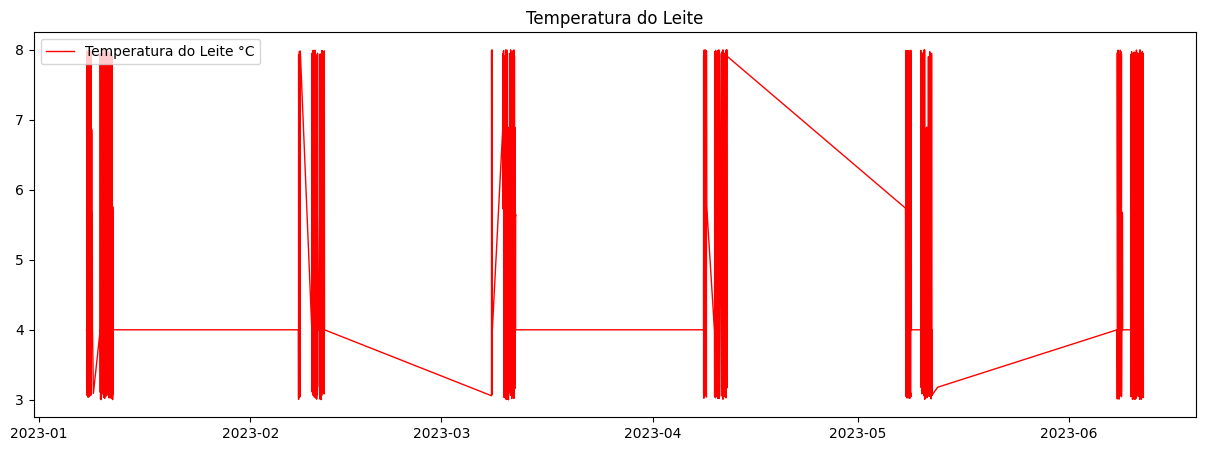

In [166]:
# plotando a evolução da temperatura do leite ajustada
fig,ax = plt.subplots(ncols=1,figsize=(15,5))

plt.plot(df_milk.data_hora, df_milk.temp, label = "Temperatura do Leite °C", linewidth=1, color='red') 

plt.title('Temperatura do Leite')
plt.legend() 

plt.savefig('grafic_image/Dados_temp_leite_fazenda.png', format='png')
plt.show()

- O gráfico nos revela que há períodos de variação estável da temperatura, variando em torno de 3°C e 4°C o que seria normal na refrigeração.

- Vemos que apresenta períodos de picos entre 3°C e 8°C que podem acontecer devido a mistura de leite novo que é acrescentado ao tanque toda manhã ou por anomalias resultado da contaminação do leite, essas variações mais altas são as que nos interessam identificar e avisar ao produtor e à empresa captadora do evento acontecido, servindo também como histórico para o controle de qualidade do leite.

- Esses picos são fundamentais para o treinamento do modelo de aprendizado por reforço, pois são eles que carregam as características de variação da temperatura que será ensinada ao modelo no seu treino.

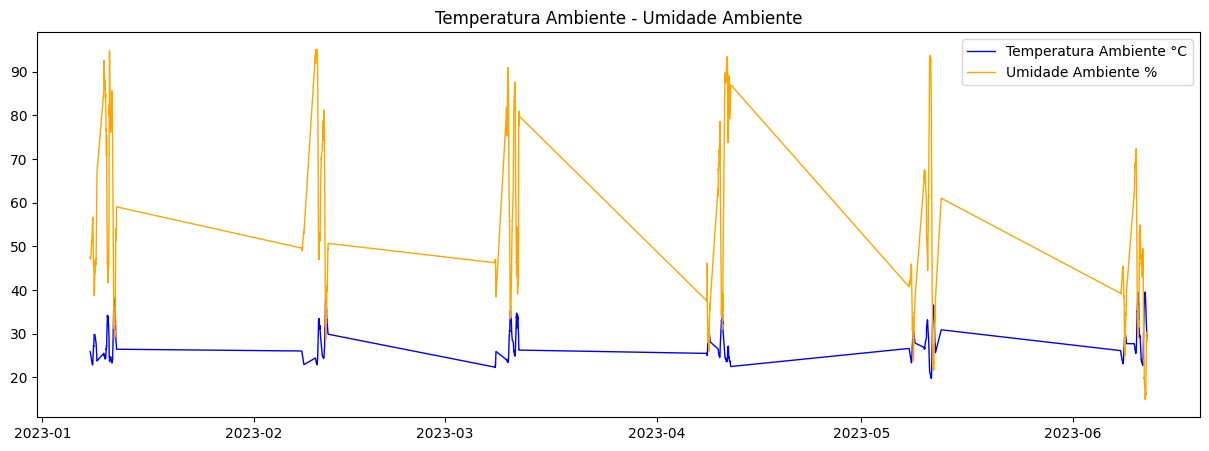

In [167]:
# plotando a evolução da temperatura ambiente e da umidade ambiente onde estava o aparelho Milk Diagnostic
fig,ax = plt.subplots(ncols=1,figsize=(15,5))

plt.plot(df_milk.data_hora, df_milk.t_ex, label = "Temperatura Ambiente °C", linewidth=1, color='blue') 
plt.plot(df_milk.data_hora, df_milk.umidade, label = "Umidade Ambiente %", linewidth=1, color='orange')  

plt.title('Temperatura Ambiente - Umidade Ambiente')
plt.legend() 

plt.savefig('grafic_image/Dados_ambiente_leite_fazenda.png', format='png')
plt.show()

- Observamos houve uma variação normal tanto da umidade ambiente (entre 10% e 95%) como da temperatura ambiente (entre 20°C e 35°C).

In [168]:
# separa parte inteira de numero
def inteiro(nro):
    return int(nro)

In [169]:
# verificando o percentual das faixas de temperaturas existentes
dfx=df_milk[['temp']]
dfx['temp_int'] = dfx.temp.apply(inteiro)
print(dfx.temp_int.value_counts(normalize=True)*100)

temp_int
4    39.688716
5    20.038911
3    19.941634
7    10.797665
6     9.533074
Name: proportion, dtype: float64


In [170]:
# eliminando mês maior ou igual que 07
df_remove = df_milk.loc[(df_milk.temp >= 7)]
df_milk = df_milk.drop(df_remove.index)

In [171]:
# define coluna anormal
def anormal(temp):
    anormal=0
    if temp<3.5 or temp>4.5:
        anormal=1
    
    return anormal

In [172]:
# invoca função para criar coluna anormal
df_milk['anormal'] = df_milk.temp.apply(anormal)

In [173]:
# verifica variavel criada
df_milk.head(5)

,local,data,hora,lat,long,umidade,t_ex,t1,t2,t3,t4,t5,t6,t7,t8,data_hora,temp,anormal
0,1,01/08/2023,00:09:30,-18.918173,-48.230431,47.418488,25.892607,24.409178,24.427492,24.427492,24.427549,24.427597,24.427624,24.423851,24.415396,2023-01-08 00:09:30,4.00000,0
1,1,01/08/2023,00:19:30,-18.918213,-48.230457,47.540405,25.869171,24.345068,24.364992,24.364992,24.365047,24.365095,24.365124,24.359230,24.351067,2023-01-08 00:19:30,4.00000,0
2,1,01/08/2023,00:29:30,-18.918280,-48.230495,47.464645,25.812103,24.269100,24.302492,24.297718,24.280001,24.270069,24.265360,24.271393,24.273392,2023-01-08 00:29:30,4.00000,0
3,1,01/08/2023,00:39:30,-18.918213,-48.230446,47.419193,25.660603,24.214598,24.221876,24.217857,24.204088,24.197790,24.205063,24.211004,24.215107,2023-01-08 00:39:30,4.00000,0
4,1,01/08/2023,00:49:30,-18.918257,-48.230518,47.535355,25.644939,24.157568,24.172058,24.175756,24.176691,24.176956,24.177114,24.167929,24.163687,2023-01-08 00:49:30,3.17097,1


In [174]:
# verificando o percentual da variável anormal
print(df_milk.anormal.value_counts(normalize=True)*100)

anormal
1    55.507088
0    44.492912
Name: proportion, dtype: float64


In [175]:
# listando a relação de colunas
list(df_milk.columns)

['local',
 'data',
 'hora',
 'lat',
 'long',
 'umidade',
 't_ex',
 't1',
 't2',
 't3',
 't4',
 't5',
 't6',
 't7',
 't8',
 'data_hora',
 'temp',
 'anormal']

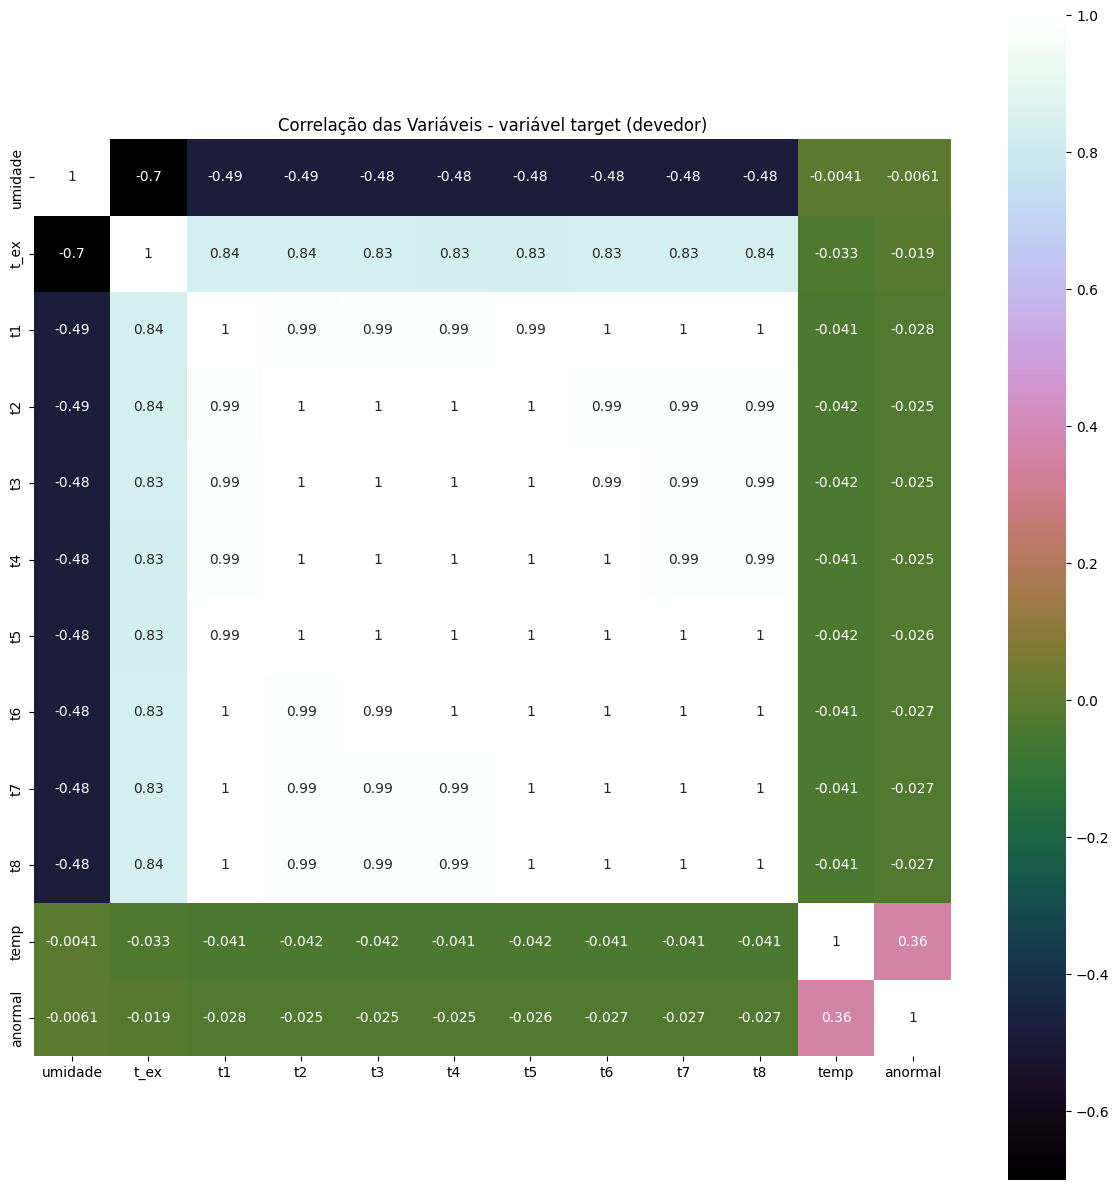

In [176]:
# analisando a correlação entre as variáveis
lista_var = list([ 'umidade',
                    't_ex',
                    't1',
                    't2',
                    't3',
                    't4',
                    't5',
                    't6',
                    't7',
                    't8',
                    'temp',
                    'anormal'])

fig, axs = pyplot.subplots(nrows=1, ncols=1, figsize=(12,12))

correlation = df_milk[lista_var].corr()
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix', ax=axs)

axs.set_title('Correlação das Variáveis - variável target (devedor)')
fig.tight_layout()

pyplot.show()

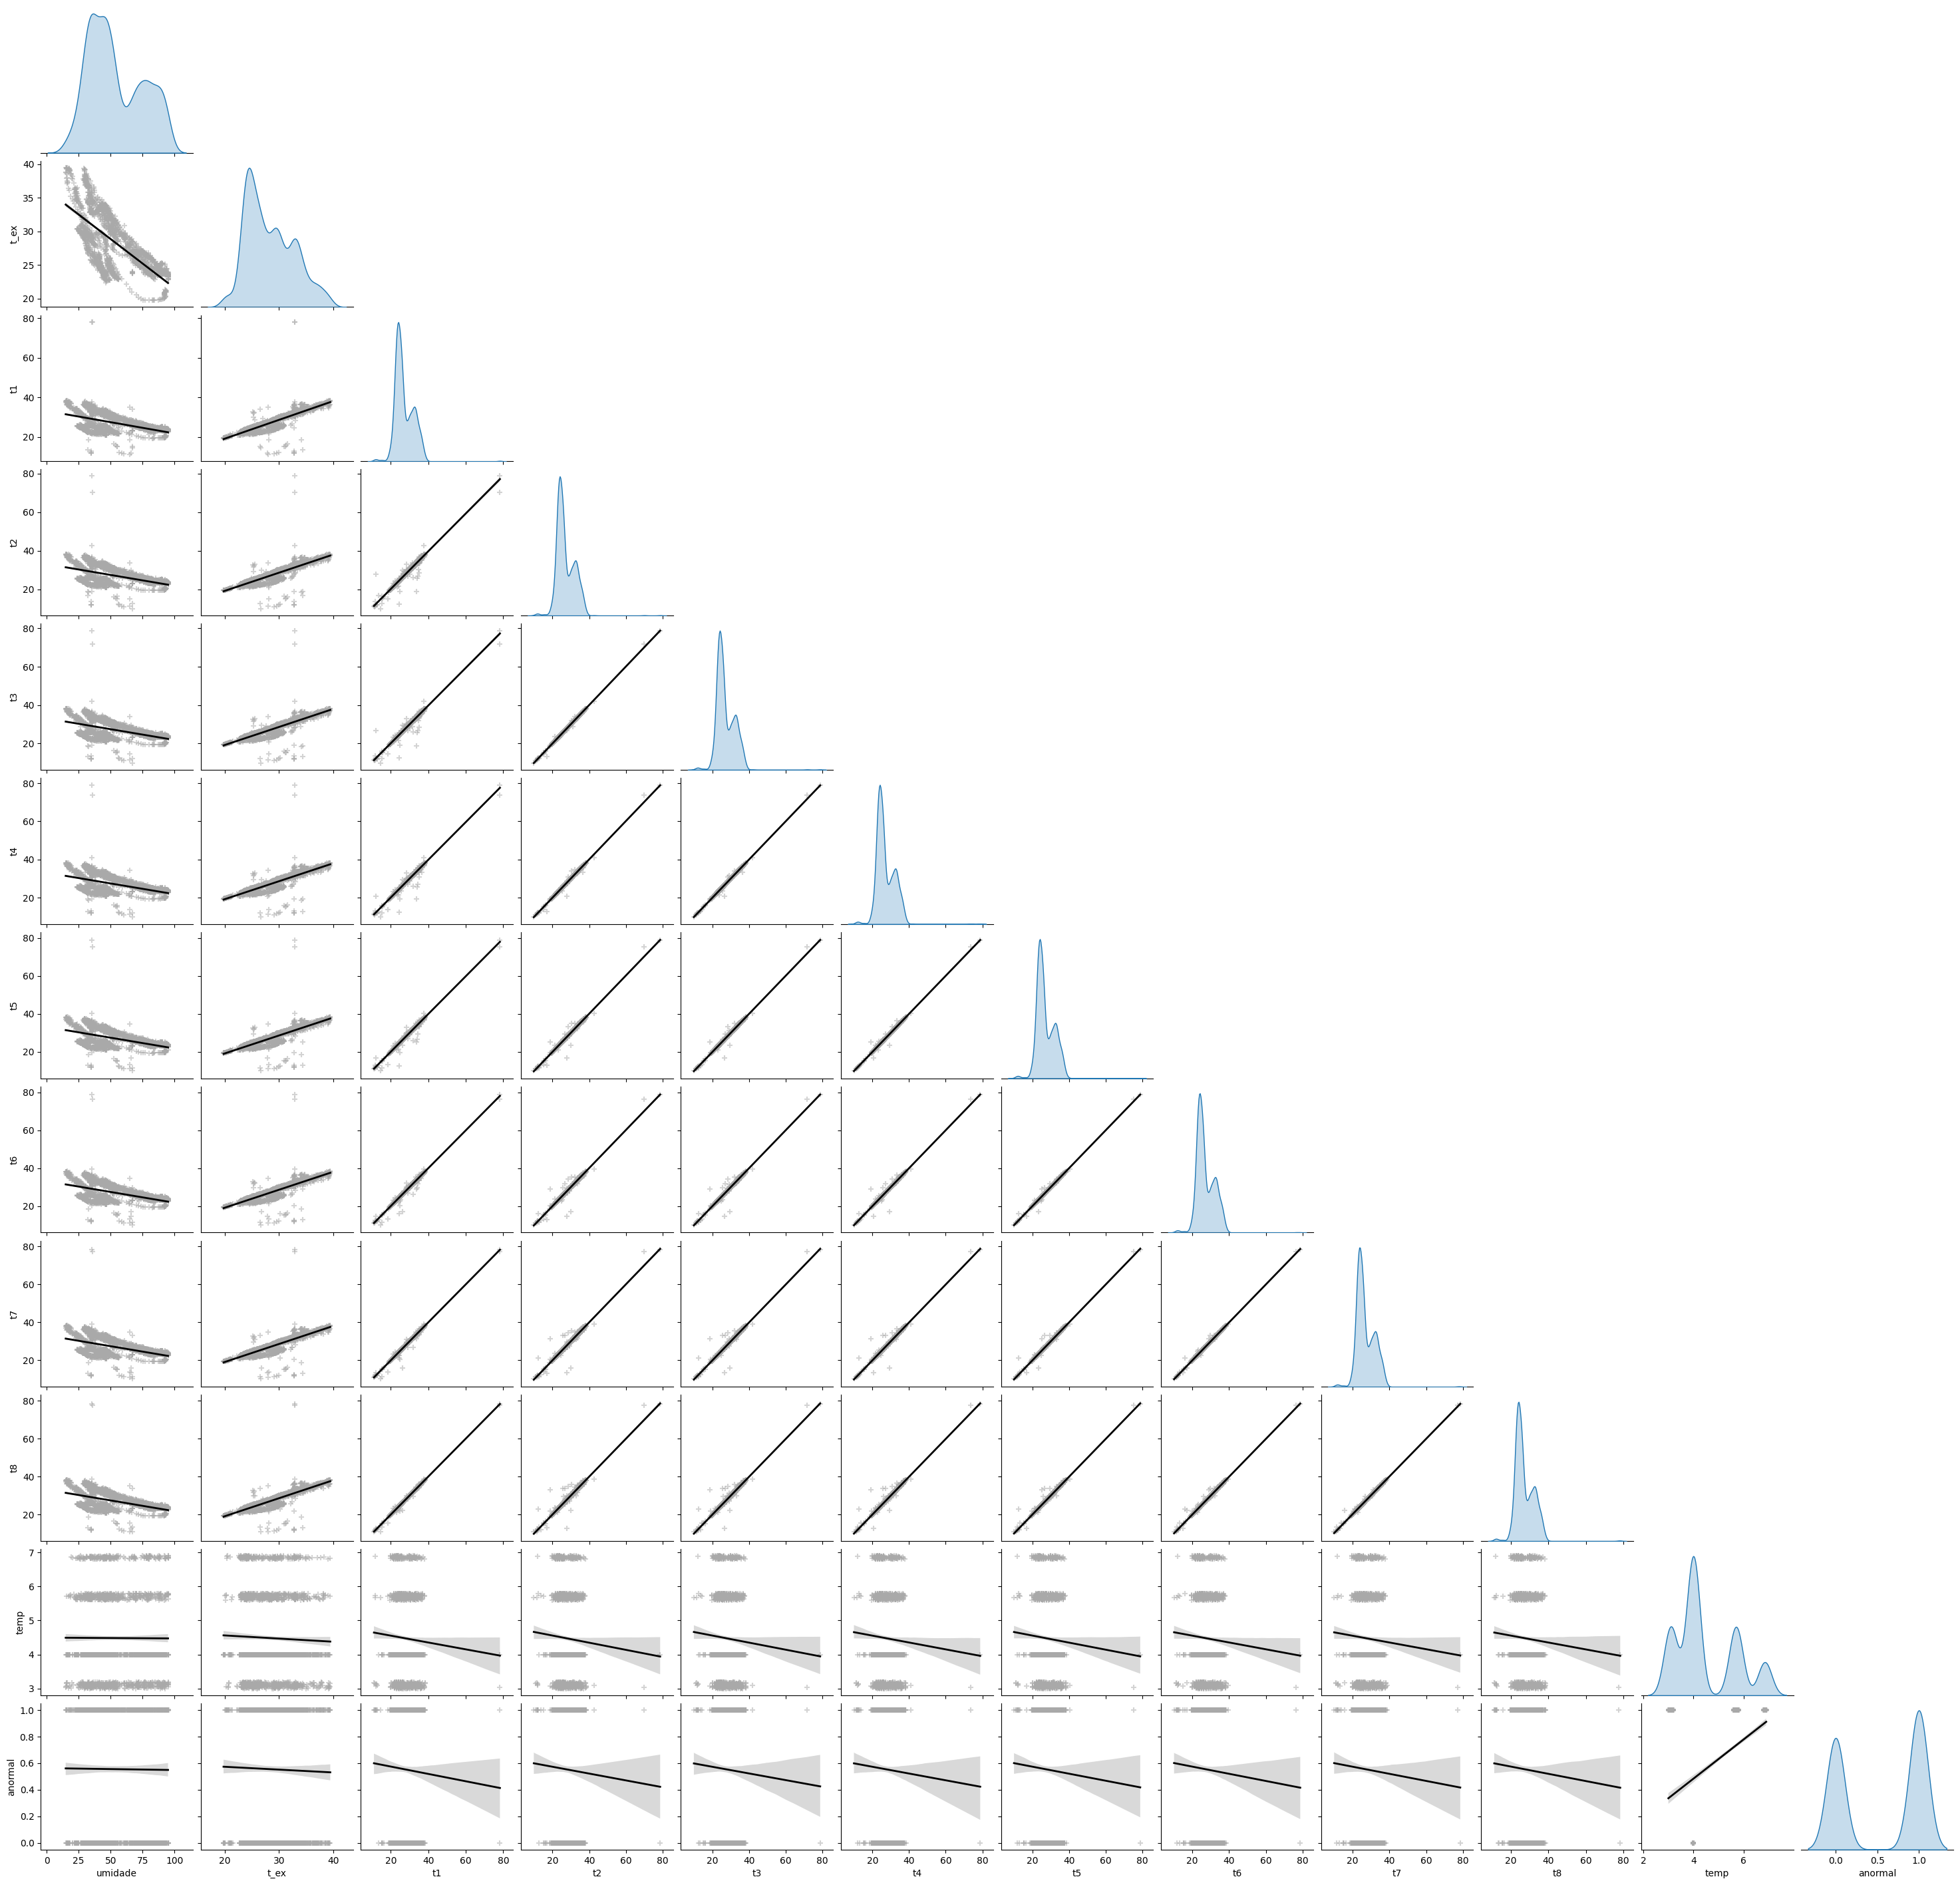

In [177]:
# verificando a dispersão das variáveis
# verificando a distribuição dos dados
p= sns.pairplot(
   df_milk[lista_var],
                diag_kind="kde", corner=True, markers="+",
                plot_kws={'line_kws':{'lw': 2, 'color':'#000000'}, 
                           'scatter_kws': {'alpha': 0.5, 
                                           'color': '#A9A9A9'}},
                kind='reg'
                )
p.fig.subplots_adjust(top=0.95)

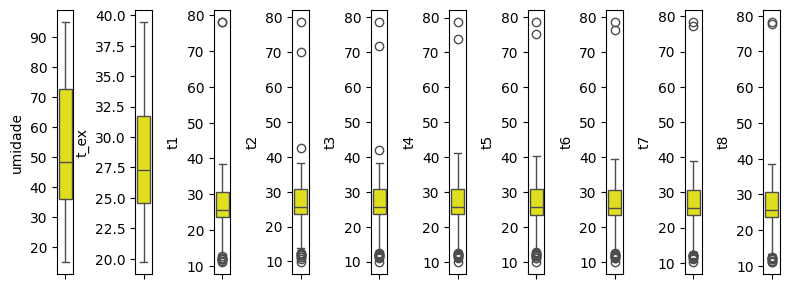

In [178]:
# visualizando boxplot para ver a distribuição nos quartis e a existência de outliers
fig, axs = pyplot.subplots(nrows=1, ncols=10, figsize=(8, 3), tight_layout=True)

search_outliers = ['umidade',
                    't_ex',
                    't1',
                    't2',
                    't3',                    
                    't4',
                    't5',
                    't6',
                    't7',
                    't8']

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_milk, ax=axs[i], color='yellow')
pyplot.show()

In [179]:
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1834 entries, 0 to 2055
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   local      1834 non-null   int64         
 1   data       1834 non-null   object        
 2   hora       1834 non-null   object        
 3   lat        1834 non-null   float64       
 4   long       1834 non-null   float64       
 5   umidade    1834 non-null   float64       
 6   t_ex       1834 non-null   float64       
 7   t1         1834 non-null   float64       
 8   t2         1834 non-null   float64       
 9   t3         1834 non-null   float64       
 10  t4         1834 non-null   float64       
 11  t5         1834 non-null   float64       
 12  t6         1834 non-null   float64       
 13  t7         1834 non-null   float64       
 14  t8         1834 non-null   float64       
 15  data_hora  1834 non-null   datetime64[ns]
 16  temp       1834 non-null   float64       
 17  

In [180]:
def retira_outliers(dfx, search_outliers):
    column_names = search_outliers

    for names in column_names[:]:
        for x in [names]:

            q75,q25 = np.percentile(dfx.loc[:,x],[75,25])
            intr_qr = q75-q25

            max = q75+(1.5*intr_qr)
            min = q25-(1.5*intr_qr)

            dfx.loc[dfx[x] < min,x] = np.nan
            dfx.loc[dfx[x] > max,x] = np.nan

    dfx = dfx.dropna(axis = 0)
            
    return dfx

In [181]:
# chama função rto para retirar outliers, vamos passar mais de uma vez para reduzir os outliers
df_milk = retira_outliers(df_milk, search_outliers)
df_milk.shape

(1819, 18)

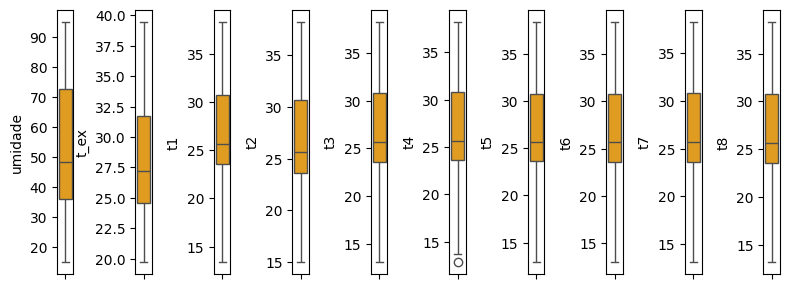

In [182]:
# visualizando boxplot para ver a distribuição nos quartis e a existência de outliers
fig, axs = pyplot.subplots(nrows=1, ncols=10, figsize=(8, 3), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_milk, ax=axs[i], color='orange')
pyplot.show()

In [183]:
# atualizando a numeração do indice do dataframe
df_milk = df_milk.reset_index()
df_milk = df_milk.drop('index', axis=1)

In [184]:
# criando faixas de valores categorizando
df = df_milk
df['temp'] = df['temp']
faixas = np.arange(0, df['temp'].max()+1, 1.9)
df['temp_faixa'] = pd.cut(df['temp'], faixas)

print('nulos', df.temp_faixa.isnull().sum())
print('')
print(df[['temp', 'temp_faixa']].head(10))
print('')
print(df.temp_faixa.value_counts(normalize=True)*100, '%')

df_milk = df

nulos 0

       temp  temp_faixa
0  4.000000  (3.8, 5.7]
1  4.000000  (3.8, 5.7]
2  4.000000  (3.8, 5.7]
3  4.000000  (3.8, 5.7]
4  3.170970  (1.9, 3.8]
5  3.111838  (1.9, 3.8]
6  3.066316  (1.9, 3.8]
7  6.893088  (5.7, 7.6]
8  6.840353  (5.7, 7.6]
9  5.788973  (5.7, 7.6]

temp_faixa
(3.8, 5.7]    56.294667
(1.9, 3.8]    22.100055
(5.7, 7.6]    21.605278
(0.0, 1.9]     0.000000
Name: proportion, dtype: float64 %


In [185]:
# verificando as variáveis e seus valores
df_milk.head(5)

,local,data,hora,lat,long,umidade,t_ex,t1,t2,t3,t4,t5,t6,t7,t8,data_hora,temp,anormal,temp_faixa
0,1,01/08/2023,00:09:30,-18.918173,-48.230431,47.418488,25.892607,24.409178,24.427492,24.427492,24.427549,24.427597,24.427624,24.423851,24.415396,2023-01-08 00:09:30,4.00000,0,"(3.8, 5.7]"
1,1,01/08/2023,00:19:30,-18.918213,-48.230457,47.540405,25.869171,24.345068,24.364992,24.364992,24.365047,24.365095,24.365124,24.359230,24.351067,2023-01-08 00:19:30,4.00000,0,"(3.8, 5.7]"
2,1,01/08/2023,00:29:30,-18.918280,-48.230495,47.464645,25.812103,24.269100,24.302492,24.297718,24.280001,24.270069,24.265360,24.271393,24.273392,2023-01-08 00:29:30,4.00000,0,"(3.8, 5.7]"
3,1,01/08/2023,00:39:30,-18.918213,-48.230446,47.419193,25.660603,24.214598,24.221876,24.217857,24.204088,24.197790,24.205063,24.211004,24.215107,2023-01-08 00:39:30,4.00000,0,"(3.8, 5.7]"
4,1,01/08/2023,00:49:30,-18.918257,-48.230518,47.535355,25.644939,24.157568,24.172058,24.175756,24.176691,24.176956,24.177114,24.167929,24.163687,2023-01-08 00:49:30,3.17097,1,"(1.9, 3.8]"


In [186]:
# definindo lista de colunas ordinal para serem transformadas
colunas_ordinal = [ 'temp_faixa']

- A variável categorica 'utilização' terá cada categoria transformada em coluna podendo receber o valor de 0 ou 1, isso devido que, cada categoria dessa variável não tem relação com as outras categorias, dessa forma elas ficarão individualizadas e imunes de qualquer influência de outra categoria.

- As demais colunas que serão transformadas em variáveis categóricas e estão na lista colunas_ordinal, vão ser compostas por faixas de valores do seu conteúdo original, sendo assim uma faixa de valor pode ser influenciada por outra faixa, dessa forma serão convertidas em nros sequenciais, ordinais, representando cada nro uma faixa.

In [187]:
# definindo uma instância do columnTransformer para fazer uma verificação de transformação de variáveis
preprocessing = ColumnTransformer(
    [
        ("ord", OrdinalEncoder(), colunas_ordinal),
    ]
)

preprocessing.fit_transform(df_milk)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

In [188]:
# fazendo a transformação de variáveis com fit_transform e convertendo para um dataframe
df_milk_trans = pd.DataFrame(
    preprocessing.fit_transform(df_milk),
    columns=preprocessing.get_feature_names_out(), 
)

In [189]:
# juntando o dataframe original dos dados categóricos com o dataframe gerado com variáveis transformadas
df_milk_trans = pd.concat([df_milk, df_milk_trans], axis=1)

In [190]:
# verificando a quantidade de registros e colunas
df_milk_trans.shape

(1819, 20)

In [191]:
# verificando a existência de nulos
df_milk_trans.isnull().sum()

local              0
data               0
hora               0
lat                0
long               0
umidade            0
t_ex               0
t1                 0
t2                 0
t3                 0
t4                 0
t5                 0
t6                 0
t7                 0
t8                 0
data_hora          0
temp               0
anormal            0
temp_faixa         0
ord__temp_faixa    0
dtype: int64

- Observamos que cada variável (coluna) possui 373 ocorrências de nulos, em termos de linhas podemos ter mais de 373 ocorrências, pois 1 campo nulo somente pode ocorrer em uma linha. Essas linhas com nulos serão eliminadas.

In [192]:
# move os dados criados e transformados para o df original
df_milk = df_milk_trans

In [198]:
# verificando as variáveis criadas
df_milk.head(5)

,local,data,hora,lat,long,umidade,t_ex,t1,t2,t3,t4,t5,t6,t7,t8,data_hora,temp,anormal,temp_faixa,ord__temp_faixa
0,1,01/08/2023,00:09:30,-18.918173,-48.230431,47.418488,25.892607,24.409178,24.427492,24.427492,24.427549,24.427597,24.427624,24.423851,24.415396,2023-01-08 00:09:30,4.00000,0,"(3.8, 5.7]",1.0
1,1,01/08/2023,00:19:30,-18.918213,-48.230457,47.540405,25.869171,24.345068,24.364992,24.364992,24.365047,24.365095,24.365124,24.359230,24.351067,2023-01-08 00:19:30,4.00000,0,"(3.8, 5.7]",1.0
2,1,01/08/2023,00:29:30,-18.918280,-48.230495,47.464645,25.812103,24.269100,24.302492,24.297718,24.280001,24.270069,24.265360,24.271393,24.273392,2023-01-08 00:29:30,4.00000,0,"(3.8, 5.7]",1.0
3,1,01/08/2023,00:39:30,-18.918213,-48.230446,47.419193,25.660603,24.214598,24.221876,24.217857,24.204088,24.197790,24.205063,24.211004,24.215107,2023-01-08 00:39:30,4.00000,0,"(3.8, 5.7]",1.0
4,1,01/08/2023,00:49:30,-18.918257,-48.230518,47.535355,25.644939,24.157568,24.172058,24.175756,24.176691,24.176956,24.177114,24.167929,24.163687,2023-01-08 00:49:30,3.17097,1,"(1.9, 3.8]",0.0


In [193]:
# verificando os valores da skew e kurtosis das variáveis transformadas
# os valores aceitos tanto para skew quanto para kurtosis devem variar entre -2 e 2
df_skew_kurtosis_og = pd.DataFrame()
df_skew_kurtosis_og['variavel'] = 'Nan'
df_skew_kurtosis_og['skew'] = 'Nan'
df_skew_kurtosis_og['kurtosis'] = 'Nan'

list_standard = search_outliers

for variavel in list(list_standard):
    skewx = skew(df_milk[variavel], axis=0, bias=True)
    kurtx = kurtosis(df_milk[variavel], axis=0, bias=True)

    dfx = {'variavel': [variavel], 'skew': [skewx], 'kurtosis': [kurtx]}
    dfx = pd.DataFrame(dfx)
    df_skew_kurtosis_og = pd.concat([df_skew_kurtosis_og, dfx], axis=0)    

    print('skew ' + variavel, skewx)
    print('kurtosis ' + variavel, kurtx)
    print('')   

skew umidade 0.41455943795439115
kurtosis umidade -1.0254464634126088

skew t_ex 0.5334608801090486
kurtosis t_ex -0.5798894636753533

skew t1 0.5801742180486565
kurtosis t1 -0.663334729215662

skew t2 0.5813456688878276
kurtosis t2 -0.6581844776054804

skew t3 0.5702659625401663
kurtosis t3 -0.6297422292255082

skew t4 0.564086374698603
kurtosis t4 -0.6283075607735924

skew t5 0.5669446885084057
kurtosis t5 -0.6210019323586149

skew t6 0.5614675212739902
kurtosis t6 -0.6201172944340398

skew t7 0.5631044429209474
kurtosis t7 -0.6229923401097972

skew t8 0.5760396773310904
kurtosis t8 -0.6456179702403899



In [194]:
# preenchendo os valore nulos com zero
# resetando o indice
df_skew_kurtosis_og = df_skew_kurtosis_og.fillna(0)
df_skew_kurtosis_og = df_skew_kurtosis_og.reset_index()
df_skew_kurtosis_og = df_skew_kurtosis_og.drop('index', axis=1)
print(df_skew_kurtosis_og)

  variavel      skew  kurtosis
0  umidade  0.414559 -1.025446
1     t_ex  0.533461 -0.579889
2       t1  0.580174 -0.663335
3       t2  0.581346 -0.658184
4       t3  0.570266 -0.629742
5       t4  0.564086 -0.628308
6       t5  0.566945 -0.621002
7       t6  0.561468 -0.620117
8       t7  0.563104 -0.622992
9       t8  0.576040 -0.645618


In [195]:
# incluindo colunas de valores mínimos e máximos para skew e kurtosis que serão plotados no gráfico
df_skew_kurtosis_og['max'] = 2
df_skew_kurtosis_og['min'] = -2

<Axes: title={'center': 'Valores de skews e kurtosis das variáveis transformadas'}, xlabel='variavel'>

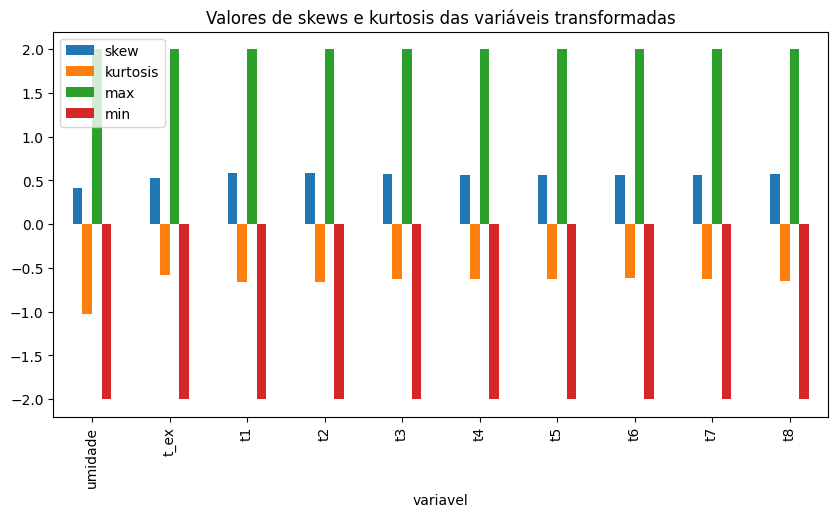

In [196]:
# plotando um gráfico para analisarmos os valores de skew e kurtosis
df_skew_kurtosis_og.plot(x='variavel', 
        kind='bar', 
        stacked=False, 
        title='Valores de skews e kurtosis das variáveis transformadas',
        figsize=(10,5))

- Observamos que todas das variáveis ficaram com os valores dentro do máximo e mínimo de skew e kurtosis, sendo assim tanto a base do sino(skew) quanto o topo(custosis) estão dentro do padrão para uma distribuição normal que serve para ser utilizada em algoritimos de modelos de regressão linear.

In [197]:
# salva os dados tratados em arquivo csv organizado pelo índice
df_milk.sort_index().to_csv('df_treated/df_milk_treated.csv', index=False)